In [ ]:
# Exploratory data analysis

In [68]:
# Importing necessary libraries
import os
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Setting working directory
direc_path = '/datar10/jupyter/user/josh.hall/condaenvs/MYENV/DATA-793 Capstone Curbside/dc_data'

os.chdir(direc_path)

In [3]:
# Loading in parquet files from `02_data_cleaning.ipynb`
# DC 2020 merged transaction and location data
dc_20 = pd.read_parquet('dc_merge_20.parquet')

In [4]:
dc_20

,meternumber,zone,paymentstart,paymentexpiry,paymentamount,paymenttype,transactionsender,blk_no,street,address,numberofsp,longitude,latitude
0,20151005,22198,2020-01-01 00:44:26,2020-01-01 00:44:26,1.75,Cash,IPS,1000,15TH ST NW,1000 15TH ST NW E,1,-77.0345,38.90269
1,20151005,22198,2020-01-01 13:19:42,2020-01-01 14:17:06,2.2,Cash,IPS,1000,15TH ST NW,1000 15TH ST NW E,1,-77.0345,38.90269
2,20151005,22198,2020-01-02 09:30:51,2020-01-02 11:30:51,4.6,CreditCard,IPS,1000,15TH ST NW,1000 15TH ST NW E,1,-77.0345,38.90269
3,20151005,22198,2020-01-02 12:56:21,2020-01-02 14:56:21,4.6,CreditCard,IPS,1000,15TH ST NW,1000 15TH ST NW E,1,-77.0345,38.90269
4,20151005,22198,2020-01-02 17:50:02,2020-01-02 18:03:05,0.5,Cash,IPS,1000,15TH ST NW,1000 15TH ST NW E,1,-77.0345,38.90269
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250837,42127791,22746,2020-12-23 14:21:03,2020-12-23 15:21:03,2.3,PayByCell,PARKMOBILE,7700,GEORGIA AVE NW,7700 GEORGIA AVE NW E,10,-77.02647,38.98322
250838,42127791,22746,2020-12-28 11:10:29,2020-12-28 11:17:29,0.3,PayByCell,PARKMOBILE,7700,GEORGIA AVE NW,7700 GEORGIA AVE NW E,10,-77.02647,38.98322
250839,20150701,23231,2020-12-24 09:54:40,2020-12-24 11:54:40,4.6,PayByCell,PARKMOBILE,700,15TH ST NW,700 15TH ST NW E,1,-77.03374,38.8989
250840,21080602,23063,2020-12-28 13:53:58,2020-12-28 14:53:58,2.3,PayByCell,PARKMOBILE,600,H ST NW,600 H ST NW S,1,-77.02049,38.89978


In [70]:
# DC 2021 merged transaction and location data
dc_21 = pd.read_parquet('dc_merge_21.parquet')

In [71]:
dc_21

,meternumber,zone,paymentstart,paymentexpiry,paymentamount,paymenttype,transactionsender,blk_no,street,address,numberofsp,longitude,latitude
0,32645338,21867,2021-01-01 01:53:35,2021-01-01 01:53:35,0.25,Cash,IPS,5300,WISCONSIN AVE NW,5300 WISCONSIN AVE NW W,1,-77.08553,38.96012
1,32645338,21867,2021-01-01 01:53:42,2021-01-01 01:53:42,0.25,Cash,IPS,5300,WISCONSIN AVE NW,5300 WISCONSIN AVE NW W,1,-77.08553,38.96012
2,32645338,21867,2021-01-01 01:53:44,2021-01-01 01:53:44,0.25,Cash,IPS,5300,WISCONSIN AVE NW,5300 WISCONSIN AVE NW W,1,-77.08553,38.96012
3,32645338,21867,2021-01-01 01:53:46,2021-01-01 01:53:46,0.25,Cash,IPS,5300,WISCONSIN AVE NW,5300 WISCONSIN AVE NW W,1,-77.08553,38.96012
4,32645338,21867,2021-01-01 01:54:46,2021-01-01 01:54:46,0.25,Cash,IPS,5300,WISCONSIN AVE NW,5300 WISCONSIN AVE NW W,1,-77.08553,38.96012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3194110,20110801,23804,2021-10-07 17:22:02,2021-10-07 17:52:02,1.15,PayByCell,PARKMOBILE,800,11TH ST NW,800 11TH ST NW E,1,-77.02697,38.90044
3194111,20120801,23195,2021-10-14 18:10:26,2021-10-14 19:40:26,3.45,PayByCell,PARKMOBILE,800,12TH ST NW,800 12TH ST NW E,1,-77.028,38.9
3194112,21101201,23505,2021-10-16 14:15:35,2021-10-16 15:15:35,2.3,PayByCell,PARKMOBILE,1200,K ST NW,1200 K ST NW N,1,-77.02918,38.9026
3194113,21101201,23505,2021-12-13 09:08:39,2021-12-13 11:08:39,4.6,PayByCell,PARKMOBILE,1200,K ST NW,1200 K ST NW N,1,-77.02918,38.9026


In [72]:
# DC 2022 merged transaction and location data
dc_22 = pd.read_parquet('dc_merge_22.parquet')

In [73]:
dc_22

,meternumber,zone,paymentstart,paymentexpiry,paymentamount,paymenttype,transactionsender,blk_no,street,address,numberofsp,longitude,latitude
0,12123606,22695,2022-01-01 00:18:01,2022-01-01 00:21:13,0.32,Cash,IPS,3600,GEORGIA AVE NW,3600 GEORGIA AVE NW W,1,-77.02425,38.93553
1,12123606,22695,2022-01-05 14:34:41,2022-01-05 14:47:44,0.5,Cash,IPS,3600,GEORGIA AVE NW,3600 GEORGIA AVE NW W,1,-77.02425,38.93553
2,12123606,22695,2022-01-05 16:59:22,2022-01-05 17:08:30,0.35,Cash,IPS,3600,GEORGIA AVE NW,3600 GEORGIA AVE NW W,1,-77.02425,38.93553
3,12123606,22695,2022-01-06 12:46:52,2022-01-06 13:19:29,1.25,Cash,IPS,3600,GEORGIA AVE NW,3600 GEORGIA AVE NW W,1,-77.02425,38.93553
4,12123606,22695,2022-01-06 12:47:17,2022-01-06 13:39:03,0.75,Cash,IPS,3600,GEORGIA AVE NW,3600 GEORGIA AVE NW W,1,-77.02425,38.93553
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4533435,23020221,23889,2022-11-29 11:01:33,2022-11-29 11:46:33,1.75,PayByCell,PARKMOBILE,200,CONSTITUTION AVE NW,200 CONSTITUTION AVE NW N,1,-77.01495,38.89215
4533436,60820226,23118,2022-12-01 09:37:41,2022-12-01 13:37:41,9.2,PayByCell,PARKMOBILE,200,12TH ST SW,200 12TH ST SW E,1,-77.02801,38.88625
4533437,60820226,23118,2022-12-01 13:50:51,2022-12-01 15:59:59,5.0,PayByCell,PARKMOBILE,200,12TH ST SW,200 12TH ST SW E,1,-77.02801,38.88625
4533438,20100601,23031,2022-12-29 16:14:09,2022-12-29 16:33:09,0.75,PayByCell,PARKMOBILE,600,10TH ST NW,600 10TH ST NW E,1,-77.02591,38.89781


In [74]:
# DC 2023 merged transaction and location data
dc_23 = pd.read_parquet('dc_merge_23.parquet')

In [75]:
dc_23

,meternumber,zone,paymentstart,paymentexpiry,paymentamount,paymenttype,transactionsender,blk_no,street,address,numberofsp,longitude,latitude
0,14872508,21641,2023-01-01 00:29:01,2023-01-01 00:29:01,0.25,Cash,IPS,2500,ONTARIO RD NW,2500 ONTARIO RD NW W,1,-77.04035,38.92398
1,14872508,21641,2023-01-01 00:29:04,2023-01-01 00:29:04,0.25,Cash,IPS,2500,ONTARIO RD NW,2500 ONTARIO RD NW W,1,-77.04035,38.92398
2,14872508,21641,2023-01-01 00:29:06,2023-01-01 00:29:06,0.25,Cash,IPS,2500,ONTARIO RD NW,2500 ONTARIO RD NW W,1,-77.04035,38.92398
3,14872508,21641,2023-01-01 00:29:08,2023-01-01 00:29:08,0.25,Cash,IPS,2500,ONTARIO RD NW,2500 ONTARIO RD NW W,1,-77.04035,38.92398
4,14872508,21641,2023-01-01 00:29:11,2023-01-01 00:29:11,0.25,Cash,IPS,2500,ONTARIO RD NW,2500 ONTARIO RD NW W,1,-77.04035,38.92398
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2468049,20101002,23803,2023-06-28 17:39:42,2023-06-28 18:39:42,2.3,PayByCell,PARKMOBILE,1000,10TH ST NW,1000 10TH ST NW W,1,-77.02608,38.90313
2468050,20101002,23803,2023-06-28 18:40:40,2023-06-28 19:40:40,2.3,PayByCell,PARKMOBILE,1000,10TH ST NW,1000 10TH ST NW W,1,-77.02608,38.90313
2468051,21070701,23523,2023-06-29 10:37:28,2023-06-29 12:37:28,6.75,PayByCell,PARKMOBILE,700,G ST NW,700 G ST NW N,1,-77.02275,38.89853
2468052,21070701,23523,2023-06-29 12:32:36,2023-06-29 14:37:28,9.5,PayByCell,PARKMOBILE,700,G ST NW,700 G ST NW N,1,-77.02275,38.89853


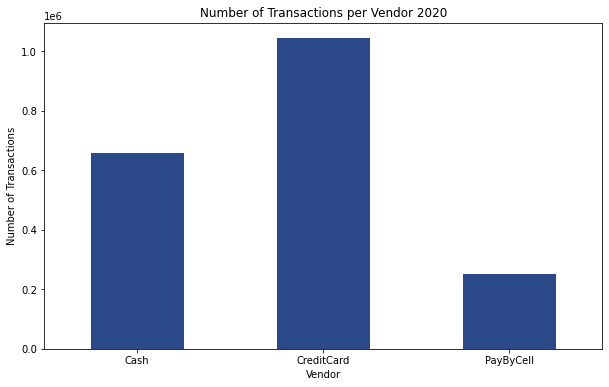

In [11]:
# Looking at payment type for 2020
transactions_per_vendor = dc_20.groupby('paymenttype').count()
# Graphing
transactions_per_vendor['transactionsender'].plot(kind='bar', figsize=(10, 6), color='#2b4888')
plt.title('Number of Transactions per Vendor 2020')
plt.xlabel('Vendor')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()

In [12]:
# Checking transaction counts directly
transactions_per_vendor['transactionsender']

paymenttype
Cash           658876
CreditCard    1043181
PayByCell      250842
Name: transactionsender, dtype: int64

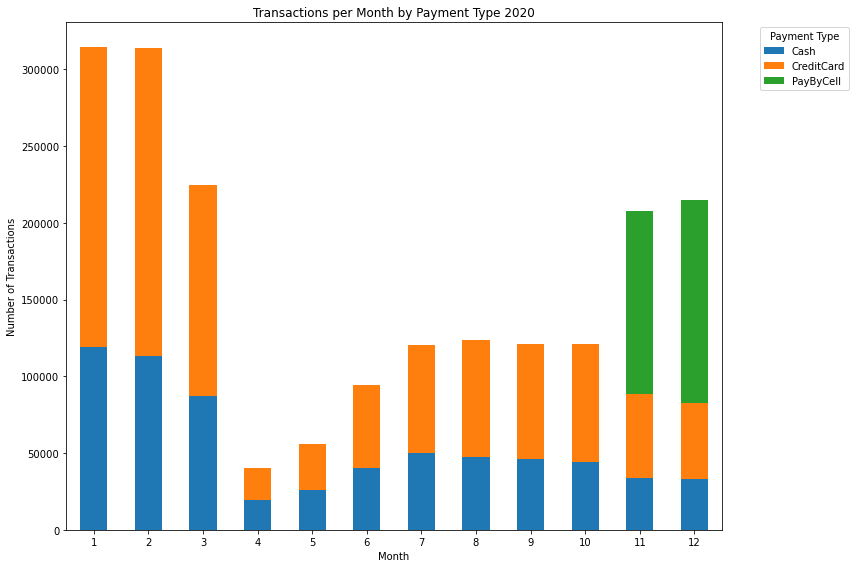

In [13]:
# Examining transactions per month
# Ensuring 'paymentstart' is in date time format
dc_20['paymentstart'] = pd.to_datetime(dc_20['paymentstart'])
# Isolating the month
dc_20['month'] = dc_20['paymentstart'].dt.month
# Grouping by 'month' and 'payment_type' and counting #
transactions_per_month_type = dc_20.groupby(['month', 'paymenttype']).size().unstack(fill_value=0)

# Plotting
transactions_per_month_type.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Transactions per Month by Payment Type 2020')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

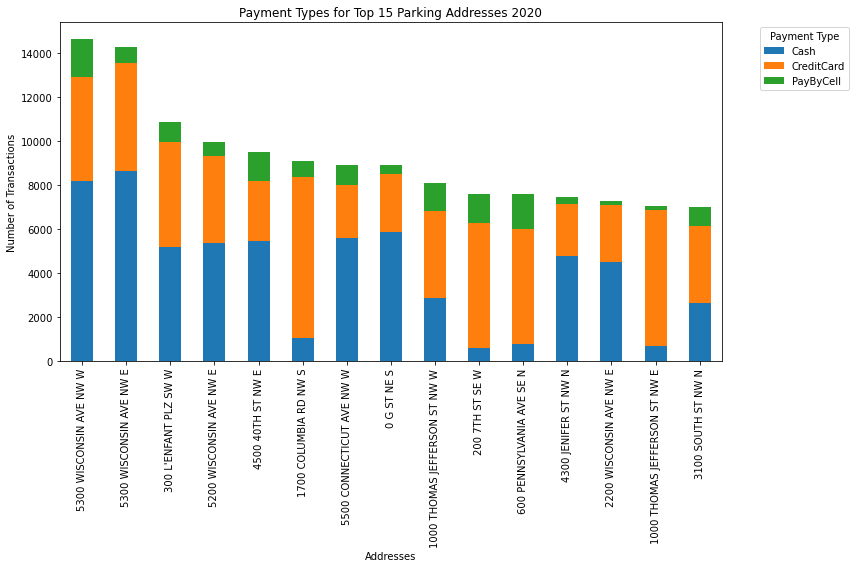

In [14]:
# Grouping on address and payment type
payment_type_counts = dc_20.groupby(['address', 'paymenttype']).size().unstack(fill_value=0)
# Selecting top 15 locations by total transaction #
top_15_locations = payment_type_counts.sum(axis=1).nlargest(15).index
top_15_payment_type_counts = payment_type_counts.loc[top_15_locations]

# Plotting
top_15_payment_type_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Payment Types for Top 15 Parking Addresses 2020')
plt.xlabel('Addresses')
plt.ylabel('Number of Transactions')
plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
# Combining dc_21, 22, and 23 for exploratory analysis
all_parking = pd.concat([dc_21, dc_22, dc_23])

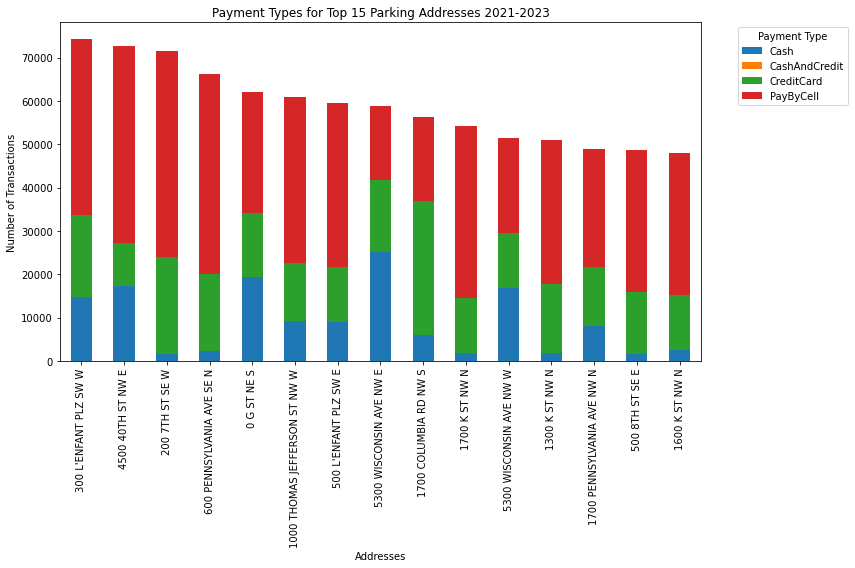

In [16]:
# Most popular spots between 2021-2023
# Grouping counts by address and payment type
payment_type_counts = all_parking.groupby(['address', 'paymenttype']).size().unstack(fill_value=0)
# Selecting top 15 locations by total transactions
top_15_locations = payment_type_counts.sum(axis=1).nlargest(15).index
top_15_payment_type_counts = payment_type_counts.loc[top_15_locations]

# Plotting
top_15_payment_type_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Payment Types for Top 15 Parking Addresses 2021-2023')
plt.xlabel('Addresses')
plt.ylabel('Number of Transactions')
plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

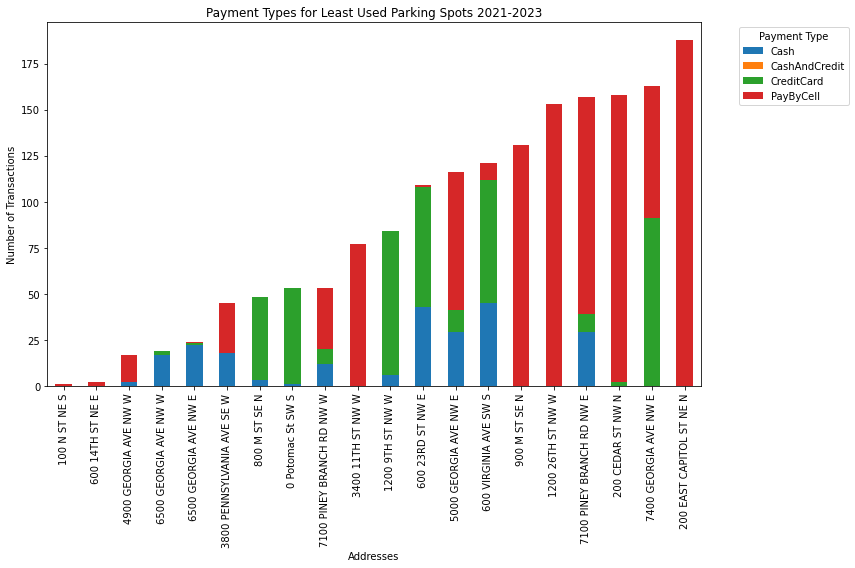

In [17]:
# Least popular spots
# Grouping counts by address and payment type
payment_type_counts = all_parking.groupby(['address', 'paymenttype']).size().unstack(fill_value=0)
# Selecting bottom 15 locations by total transactions
bottom_15_locations = payment_type_counts.sum(axis=1).nsmallest(20).index
bottom_15_payment_type_counts = payment_type_counts.loc[top_15_locations]

# Plotting
bottom_15_payment_type_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Payment Types for Least Used Parking Spots 2021-2023')
plt.xlabel('Addresses')
plt.ylabel('Number of Transactions')
plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [77]:
# Looking into least popular address
lowest_address = '100 N ST NE S'

# Filter the DataFrame to include only rows where the 'address' column matches the desired address
lowest_address_only = all_parking[all_parking['address'] == lowest_address]
lowest_address_only

,meternumber,zone,paymentstart,paymentexpiry,paymentamount,paymenttype,transactionsender,blk_no,street,address,numberofsp,longitude,latitude
4517877,61530101,24995,2022-01-15 10:00:41,2022-01-15 11:00:41,2.3,PayByCell,PARKMOBILE,100,N ST NE,100 N ST NE S,1,-77.00559,38.90718


In [ ]:
# Manually checked lowest address, it is for a reserved handicap spot (but still is reservable as of May 2024)... perhaps not enforced for parking?

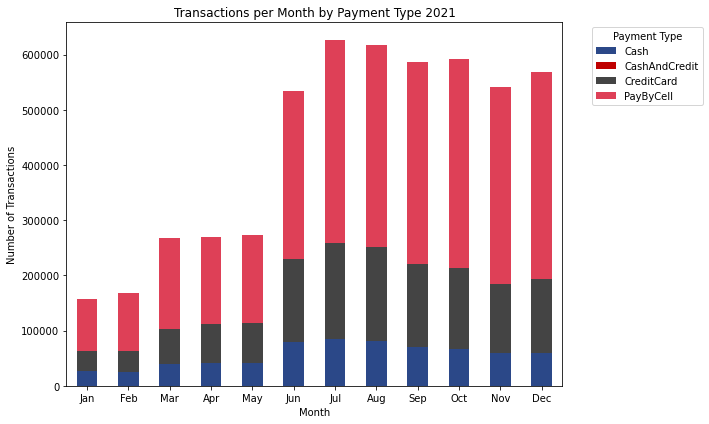

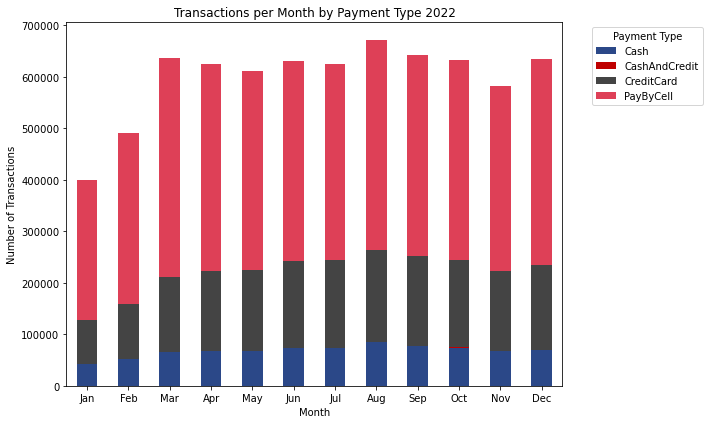

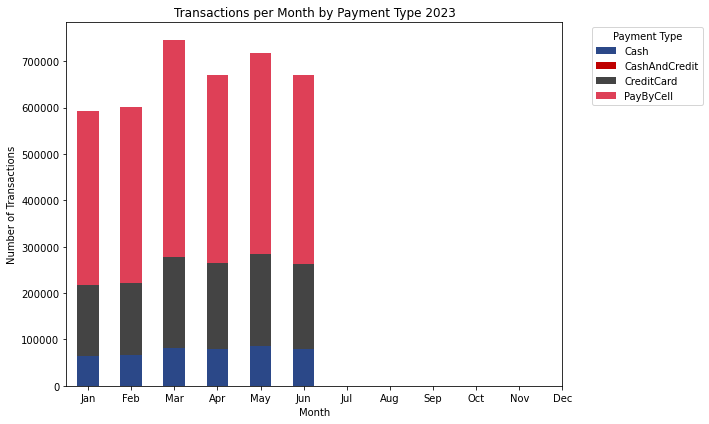

In [76]:
# Making function to more easily plot all years of data
def plot_trans_w_payment(data, year):
    # Ensuring 'paymentstart' is in datetime format and on the month level
    data['paymentstart'] = pd.to_datetime(data['paymentstart'])
    data['year'] = data['paymentstart'].dt.year
    data_year = data[data['year'] == year]
    data_year['month'] = data_year['paymentstart'].dt.month
    # Grouping by month and payment type, then counting transaction #
    transactions_per_month_type = data_year.groupby(['month', 'paymenttype']).size().unstack(fill_value=0) 
    
    # Plotting
    colors = ['#2b4888', '#BF0000', '#444444', '#DE4057']
    ax = transactions_per_month_type.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
    plt.title(f'Transactions per Month by Payment Type {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Transactions')
    # Defining months for x-axis
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plt.xticks(range(0, 12), months, rotation=0)
    plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Running function
plot_trans_w_payment(dc_21, 2021)
plot_trans_w_payment(dc_22, 2022)
plot_trans_w_payment(dc_23, 2023)

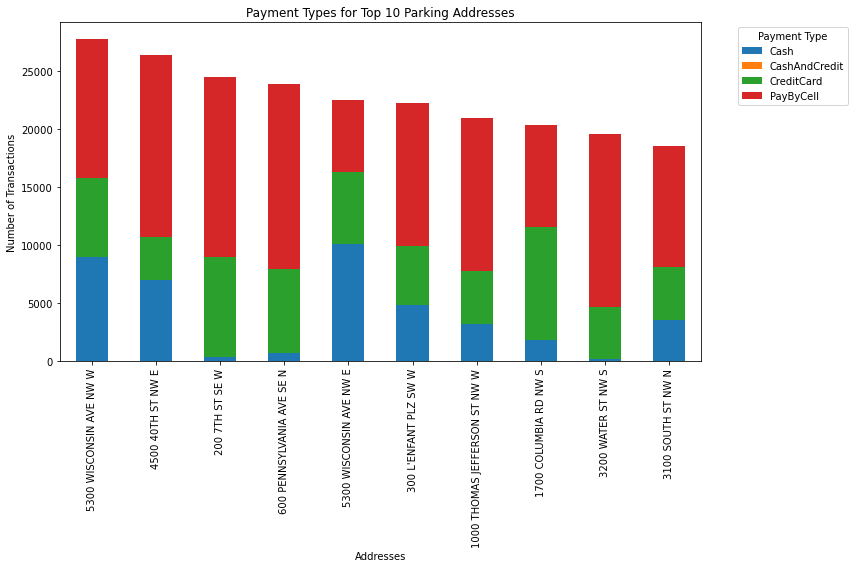

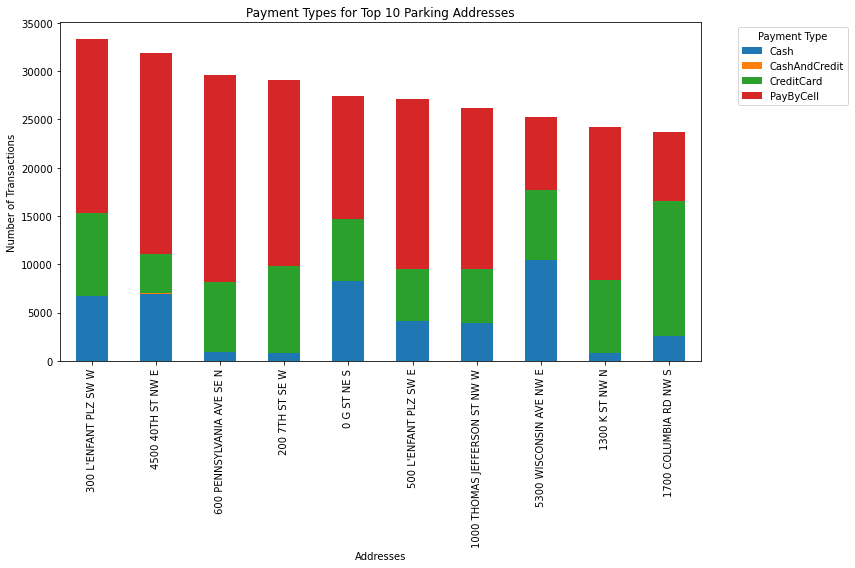

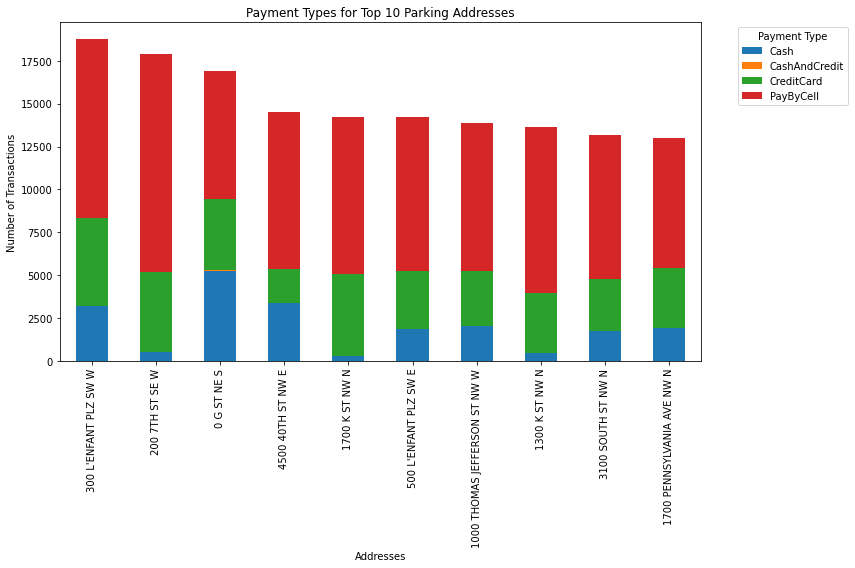

In [19]:
# Making function to plot top 10 addresses for each year
def plot_top_payment_types_by_address(data, top_n):
    # Grouping on address and payment
    payment_type_counts = data.groupby(['address', 'paymenttype']).size().unstack(fill_value=0)
    # Selecting top n locations by transaction total
    top_n_locations = payment_type_counts.sum(axis=1).nlargest(top_n).index
    top_n_payment_type_counts = payment_type_counts.loc[top_n_locations]
    
    # Plotting
    top_n_payment_type_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
    plt.title(f'Payment Types for Top {top_n} Parking Addresses')
    plt.xlabel('Addresses')
    plt.ylabel('Number of Transactions')
    plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Running function on each year
plot_top_payment_types_by_address(dc_21, 10)
plot_top_payment_types_by_address(dc_22, 10)
plot_top_payment_types_by_address(dc_23, 10)